In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import mlab
import scipy.signal as signal
from scipy import stats
import pandas as pd
from scipy import linalg
import os
import glob

*MLML Shore Station Data>Moss_Landing>netcdf*
https://drive.google.com/drive/u/3/folders/1kHGUe0LtATtH5veMkt-f35pgTuz2AGWZ

In [2]:
local_dataset_2021='moss_landing_2021.nc'

In [3]:
ds2021=xr.open_dataset(local_dataset_2021)

In [4]:
df=ds2021.to_dataframe()

Text(0.5, 0, 'Year-Month')

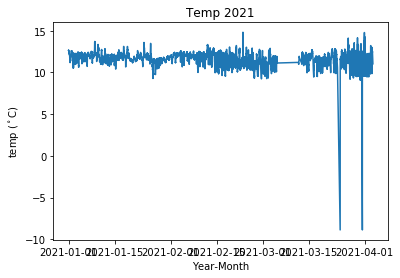

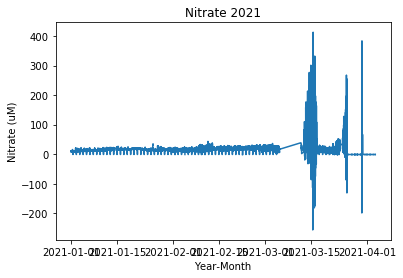

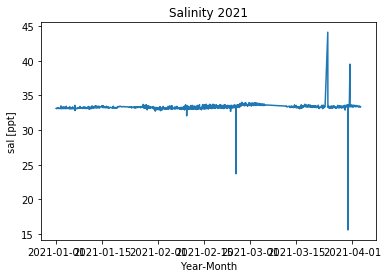

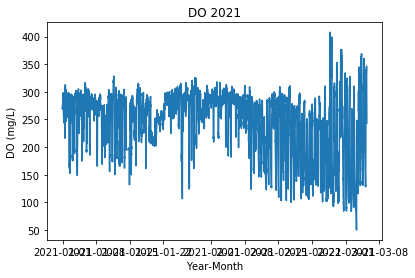

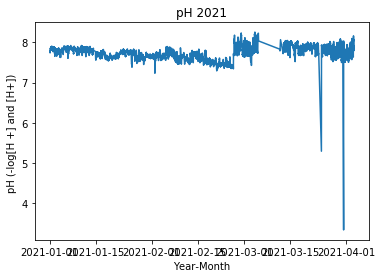

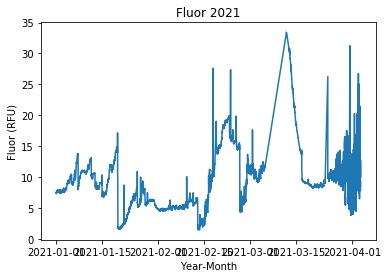

In [5]:
#Temp 2021
plt.figure()
plt.plot(df.index,df['temp'])
plt.title('Temp 2021')
plt.ylabel('temp ($^\circ$C)')
plt.xlabel('Year-Month')

#Nitrate 2021
plt.figure()
plt.plot(df.index,df['nitrate'])
plt.title('Nitrate 2021')
plt.ylabel('Nitrate (uM)')
plt.xlabel('Year-Month')

#Salinity 2021
plt.figure()
plt.plot(df.index,df['sal'])
plt.title('Salinity 2021')
plt.ylabel('sal [ppt]')
plt.xlabel('Year-Month')

#DO 2021
plt.figure()
plt.plot(df.index,df['do2'])
plt.title('DO 2021')
plt.ylabel('DO (mg/L)')
plt.xlabel('Year-Month')

#pH 2021
plt.figure()
plt.plot(df.index,df['ph']) 
plt.title('pH 2021')
plt.ylabel('pH (-log[H +] and [H+]) ') 
plt.xlabel('Year-Month')

#Fluorescence
plt.figure()
plt.plot(df.index,df['fluor']) 
plt.title('Fluor 2021')
plt.ylabel('Fluor (RFU)') 
plt.xlabel('Year-Month')

In [6]:
df=ds2021.to_dataframe()

In [7]:
ii_df=np.array((df['temp_flg'] == 1) & (df['sal_flg'] == 1) & (df['fluor_flg'] == 1) & (df['ph_flg'] == 1) & (df['do2_flg'] == 1) & (df['nitrate_flg'] ==1))

In [8]:
ii_df

array([ True,  True,  True, ..., False, False, False])

In [9]:
temp_df= np.array(df['temp'][ii_df])
nitrate_df = np.array(df['nitrate'][ii_df])
sal_df= np.array(df['sal'][ii_df])
fluor_df= np.array(df['fluor'][ii_df])
pH_df= np.array(df['ph'][ii_df])
do2_df= np.array(df['do2'][ii_df])

In [10]:
#Shape:(16939,)
# np.shape(temp_df)
#np.shape(sal_df)
#np.shape(fluor_df)
#np.shape(pH_df)
#np.shape(do2_df)

In [11]:
PCA_df = pd.DataFrame(temp_df, columns=['temp'])
PCA_df['nitrate'] = nitrate_df.tolist()
PCA_df['sal'] = sal_df.tolist()
PCA_df['fluor'] = fluor_df.tolist()
PCA_df['pH'] = pH_df.tolist()
PCA_df['do2'] = do2_df.tolist()

In [12]:
PCA_df

,temp,nitrate,sal,fluor,pH,do2
0,12.623983,11.02,33.120840,7.344685,7.7670,269.33
1,12.627052,10.75,33.118129,7.363977,7.7670,269.15
2,12.620147,9.97,33.117203,7.363977,7.7760,271.28
3,12.645462,9.10,33.111905,7.383269,7.7760,269.07
4,12.654665,9.68,33.106791,7.392915,7.7715,271.31
...,...,...,...,...,...,...
16934,11.154231,15.81,33.628876,11.608177,8.0460,248.18
16935,11.142480,15.82,33.627171,11.608177,8.0460,247.96
16936,11.133079,15.71,33.629557,11.598531,8.0415,246.29
16937,11.132295,16.63,33.628193,11.579239,8.0415,245.47


In [13]:
R = np.corrcoef(PCA_df, rowvar=False) 

In [14]:
R

array([[ 1.        , -0.67438545, -0.78580541, -0.16448434,  0.16906869,
         0.69734529],
       [-0.67438545,  1.        ,  0.66466539,  0.11782201, -0.47086073,
        -0.84558923],
       [-0.78580541,  0.66466539,  1.        ,  0.1803806 ,  0.00858192,
        -0.69652096],
       [-0.16448434,  0.11782201,  0.1803806 ,  1.        , -0.11903237,
        -0.2093266 ],
       [ 0.16906869, -0.47086073,  0.00858192, -0.11903237,  1.        ,
         0.46865818],
       [ 0.69734529, -0.84558923, -0.69652096, -0.2093266 ,  0.46865818,
         1.        ]])

In [15]:
val, vec = linalg.eig(R)

In [16]:
vec

array([[ 0.46625954, -0.28016289,  0.03330837, -0.76836673,  0.29515738,
         0.15967478],
       [-0.49414129, -0.12703237, -0.16884847, -0.42516915, -0.62762073,
         0.36946011],
       [-0.45200702,  0.44551069,  0.01338151, -0.10601015,  0.6077669 ,
         0.4652011 ],
       [-0.14784086, -0.10696694,  0.97855211, -0.03370556, -0.08350504,
         0.03205875],
       [ 0.23714035,  0.82615698,  0.096999  , -0.31964251, -0.30417885,
        -0.23900667],
       [ 0.50598775,  0.11364189,  0.05682115,  0.33808019, -0.22382109,
         0.75062586]])

In [17]:
val = np.real(val)

In [18]:
np.real(val)
np.sum(val)

5.999999999999999

In [19]:
pctvar = val/np.sum(val)*100

In [20]:
pctvar

array([56.19007405, 18.32621498, 15.87639699,  4.57842086,  2.65715398,
        2.37173914])

In [21]:
A = np.dot(vec, np.diag(val**.5))

In [22]:
A

array([[ 0.85611708, -0.29378027,  0.0325091 , -0.40271892,  0.11785218,
         0.06023451],
       [-0.90731183, -0.13320681, -0.16479678, -0.22284107, -0.25060011,
         0.13937236],
       [-0.82994748,  0.46716483,  0.01306041, -0.05556239,  0.24267276,
         0.17548897],
       [-0.2714563 , -0.11216609,  0.95507078, -0.01766587, -0.03334239,
         0.0120936 ],
       [ 0.43542252,  0.86631252,  0.09467141, -0.16753209, -0.12145433,
        -0.09016108],
       [ 0.92906357,  0.11916547,  0.05545767,  0.17719571, -0.08936861,
         0.28316046]])

In [23]:
print('PC1 loading')
print(A[:,0])
print('temp', 'nitrate', 'sal', 'fluor', 'pH', 'do2')

PC1 loading
[ 0.85611708 -0.90731183 -0.82994748 -0.2714563   0.43542252  0.92906357]
temp nitrate sal fluor pH do2


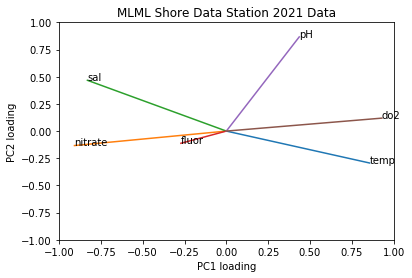

In [24]:
plt.figure
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('MLML Shore Data Station 2021 Data')
plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

variables = ['temp', 'nitrate', 'sal', 'fluor', 'pH', 'do2']
for i, txt in enumerate (variables):
    plt.plot ([0,A[i,0]], [0, A[i,1]], '-')
    plt.text(A[i,0], A[i,1], txt)

In [25]:
tau = np.dot(PCA_df, vec)
tau
np.shape(tau)

(16939, 6)

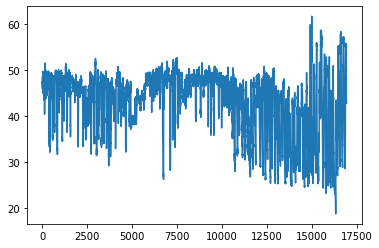

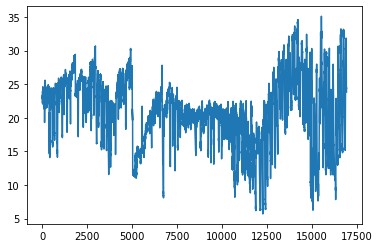

In [26]:
plt.figure()
plt.plot(tau[:,1]) #PC1

plt.figure()
plt.plot(tau[:,2]) #PC2

In [27]:
print(df.head)

<bound method NDFrame.head of                           temp  temp_flg      cond  cond_flg        sal  \
time                                                                      
2021-01-01 00:00:34  12.623983       1.0  0.896977       1.0  33.120840   
2021-01-01 00:05:35  12.627052       1.0  0.896977       1.0  33.118129   
2021-01-01 00:10:34  12.620147       1.0  0.896806       1.0  33.117203   
2021-01-01 00:15:35  12.645462       1.0  0.897221       1.0  33.111905   
2021-01-01 00:20:34  12.654665       1.0  0.897294       1.0  33.106791   
...                        ...       ...       ...       ...        ...   
2021-04-03 12:00:43  11.042915       1.0  0.868913       1.0  33.364048   
2021-04-03 12:05:44  11.032715       1.0  0.868718       1.0  33.365014   
2021-04-03 12:10:43  11.028007       1.0  0.868669       1.0  33.367225   
2021-04-03 12:15:44  11.027222       1.0  0.868620       1.0  33.365855   
2021-04-03 12:20:43  11.027222       1.0  0.868620       1.0  33.36585

Time doesnt work here for some reason 

In [28]:
# plt.figure()
# plt.plot(df['temp'], df['time'])
# plt.ylabel('Temp Degrees C')
# plt.title('Temp 2021')
# plt.xlabel('Year-Month')

Text(0.5, 1.0, '[periodogram, temp for 2021]')

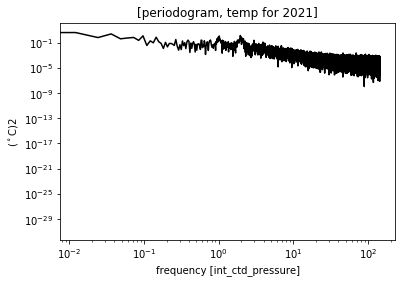

In [29]:
from scipy.signal import periodogram
from scipy.signal import welch

f,S = periodogram(df['temp'],fs=288)
plt.figure()
plt.loglog(f,S,'k-')
plt.xlabel('frequency [int_ctd_pressure]')
plt.ylabel('($^\circ$C)2')#variance per unit frequency 
plt.title('[periodogram, temp for 2021]')

In [30]:
N = len(df['temp'])
fs = 288
fN = 0.5* fs 

In [31]:
df['temp']

time
2021-01-01 00:00:34    12.623983
2021-01-01 00:05:35    12.627052
2021-01-01 00:10:34    12.620147
2021-01-01 00:15:35    12.645462
2021-01-01 00:20:34    12.654665
                         ...    
2021-04-03 12:00:43    11.042915
2021-04-03 12:05:44    11.032715
2021-04-03 12:10:43    11.028007
2021-04-03 12:15:44    11.027222
2021-04-03 12:20:43    11.027222
Name: temp, Length: 23847, dtype: float64

Temp for some reason 'is not defined' even though it is defined in the cell above

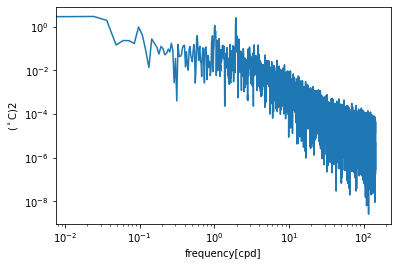

In [32]:
f, S = welch(df['temp'], fs=288, nperseg=N)

plt.figure()
plt.loglog(f,S)
plt.xlabel('frequency[cpd]')
plt.ylabel('($^\circ$C)2')#variance per unit frequency 
winlen = N/2
f2,S2 = welch(df['temp'], fs=288, nperseg=winlen, window='hanning') 
#plt.ylim(.00001) #use these to look at specific parts of the periodogram
#plt.xlim(.00001) #use these to look at specific parts of the periodogram 

(0.01, 230.23087137267274)

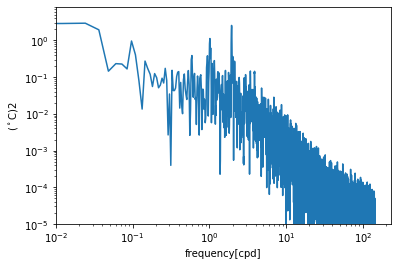

In [33]:
f, S = welch(df['temp'], fs=288, nperseg=N)

plt.figure()
plt.loglog(f,S)
plt.xlabel('frequency[cpd]')
plt.ylabel('($^\circ$C)2')#variance per unit frequency 
winlen = N/2
f2,S2 = welch(df['temp'], fs=288, nperseg=winlen, window='hanning') 
plt.ylim(.00001) #use these to look at specific parts of the periodogram
plt.xlim(.01) #use these to look at specific parts of the periodogram 

Text(5, 0.01, '95%')

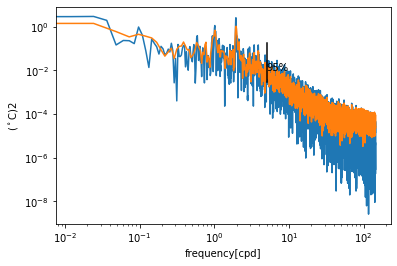

In [34]:
#raw periodogram (noisy, biased)
f, S = welch(df['temp'], fs=288, nperseg=N) #window='boxcar'

plt.figure()
plt.loglog(f,S)
plt.xlabel('frequency[cpd]')
plt.ylabel('($^\circ$C)2')#variance per unit frequency 
winlen = N/2
f2,S2 = welch (df['temp'], fs=288., nperseg=winlen, window='hanning') 
#weighs middle more than edges like boxcar

plt.loglog(f2,S2)

# confidence intervals 

from scipy.stats import chi2

dof = N/winlen/2 #dof depends on window length, relative to length of time series 
edof = (8/3)*dof #bonus points for using a sensible window (Hanning) :)

lower = edof/chi2.ppf(0.975,edof)
upper = edof/chi2.ppf(0.025, edof)

fplot = 5 #hoirzontal position of CI on plot

Splot = 0.01 #vertical position of CI on plot

plt.plot([fplot, fplot], Splot*np.array([lower, upper]), '-k')
plt.text(fplot, Splot, '95%') 


Text(5, 0.01, '95%')

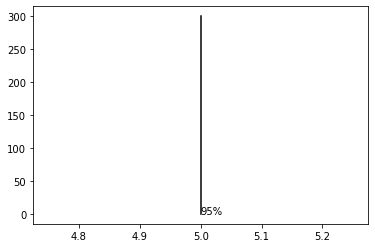

In [35]:
dof = N/winlen/8 #dof depends on window length, relative to length of time series 
edof = (8/3)*dof #bonus points for using a sensible window (Hanning)

lower = edof/chi2.ppf(0.975,edof)
upper = edof/chi2.ppf(0.025, edof)

fplot = 5 #hoirzontal position of CI on plot

Splot = 0.01 #vertical position of CI on plot

plt.plot([fplot, fplot], Splot*np.array([lower, upper]), '-k')
plt.text(fplot, Splot, '95%') 

In [36]:
#Wind data 

In [125]:
df2021jan=pd.read_csv('Wind Data/2021-01.csv')
df2021feb=pd.read_csv('Wind Data/2021-02.csv')
df2021march=pd.read_csv('Wind Data/2021-03.csv')
df2021apr=pd.read_csv('Wind Data/2021-04.csv')
df2021may=pd.read_csv('Wind Data/2021-05.csv')
df2021june=pd.read_csv('Wind Data/2021-06.csv')
df2021july=pd.read_csv('Wind Data/2021-07.csv')
df2021aug=pd.read_csv('Wind Data/2021-08.csv')
df2021sept=pd.read_csv('Wind Data/2021-09.csv')
df2021oct=pd.read_csv('Wind Data/2021-10.csv')
df2021nov=pd.read_csv('Wind Data/2021-11.csv')
df2021dec=pd.read_csv('Wind Data/2021-12.csv')

In [129]:
merged_files_2021=pd.concat([df2021jan, df2021feb, df2021march, df2021apr, df2021may, df2021june, df2021july, df2021aug, df2021sept, df2021oct, df2021nov, df2021dec])

In [134]:
# merged_files_2021
merged_files_2021.head

<bound method NDFrame.head of                    utc_time             pst_time   unix_time  wspd  wspd_flg  \
0      2021-01-01T08:00:00Z  2021-01-01 00:00:00  1609488000   1.8         1   
1      2021-01-01T08:01:00Z  2021-01-01 00:01:00  1609488060   1.5         1   
2      2021-01-01T08:02:00Z  2021-01-01 00:02:00  1609488120   1.5         1   
3      2021-01-01T08:03:00Z  2021-01-01 00:03:00  1609488180   1.6         1   
4      2021-01-01T08:05:00Z  2021-01-01 00:05:00  1609488300   1.5         1   
...                     ...                  ...         ...   ...       ...   
42609  2021-12-30T22:44:00Z  2021-12-30 14:44:00  1640904240   1.3         1   
42610  2021-12-30T22:45:00Z  2021-12-30 14:45:00  1640904300   0.8         1   
42611  2021-12-30T22:46:00Z  2021-12-30 14:46:00  1640904360   1.4         1   
42612  2021-12-30T22:47:00Z  2021-12-30 14:47:00  1640904420   1.5         1   
42613  2021-12-30T22:48:00Z  2021-12-30 14:48:00  1640904480   1.0         1   

       wd

In [160]:
merged_files_2021['time'] = pd.to_datetime(merged_files_2021['pst_time']).dt.date #Date versus wind

#Need to figure out time versus wind 

#merged_files_2021['time'] = pd.to_datetime(merged_files_2021['time']).dt.strftime('%H%M%S').astype(float)

#merged_files_2021['time'] = pd.to_datetime(merged_files_2021['pst_time'], errors='coerce').dt.time

#merged_files_2021['time'] = pd.to_datetime(merged_files_2021['pst_time'], '%Y-%m-%d%H:%M:%S', errors='coerce').dt.strftime('%H:%M%:S').astype(float)

In [161]:
merged_files_2021['wspd'] #float
merged_files_2021['time'] #object 

0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-01
4        2021-01-01
            ...    
42609    2021-12-30
42610    2021-12-30
42611    2021-12-30
42612    2021-12-30
42613    2021-12-30
Name: time, Length: 459938, dtype: object

In [162]:
# plt.figure
# plt.plot(merged_files_2021['time'],merged_files_2021['wspd'])

In [163]:
time = np.array(merged_files_2021['time'])#time numpy array
wind_spd = np.array(merged_files_2021['wspd'])#wind speed numpy array
wind_dir = np.array(merged_files_2021['wdir'])#wind direction numpy array

Text(0, 0.5, '[m/s]')

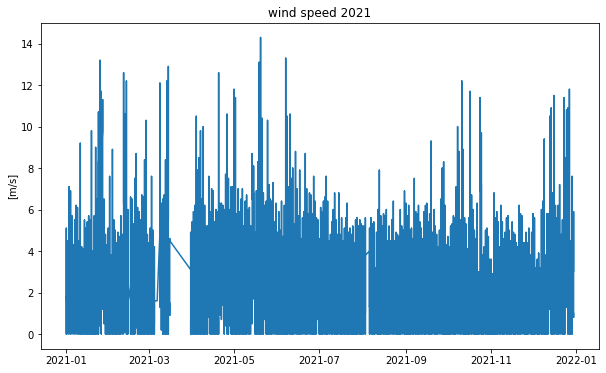

In [172]:
plt.figure(figsize=(10,6))
plt.plot(time,wind_spd )
plt.title('wind speed 2021')
plt.ylabel('[m/s]')

Text(0, 0.5, '[degrees]')

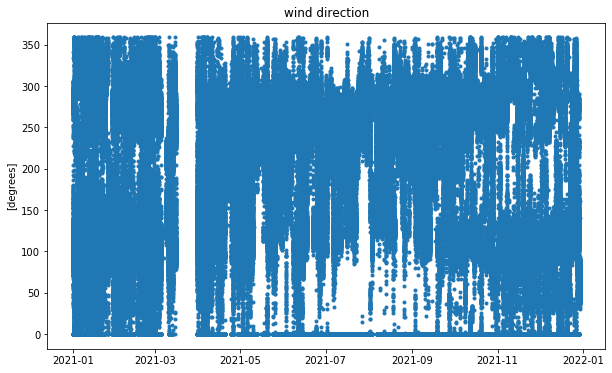

In [175]:
plt.figure(figsize=(10,6))
plt.plot(time, wind_dir, '.')
plt.title('wind direction')
plt.ylabel('[degrees]')
#seems to be missing data 
#direction is in degrees
#degreees clockwise from true north
#directions is where wind is blowing from coming from true north

In [176]:
def wind_uv_from_spddir(wspd,wdir):
    '''Convert wind speed and direction to eastward and northward components.
    
    Inputs
    wspd - wind speed
    wdir - wind direction (wind is blowing FROM this direction, 
                           clockwise from true north)
    
    Output:
    u - eastward velocity component (TOWARDS the east)
    v - northward velocity component (TOWARDS the north)
    '''
    
    theta = np.array(wdir) # direction CW from true north
    theta = theta*np.pi/180. # convert to radians
    x = -np.sin(-theta)
    y = np.cos(-theta)
    theta_cart = np.arctan2(y,x) # direction CCW from east (Cartesian)
    u = -wspd*np.cos(theta_cart) # eastward component
    v = -wspd*np.sin(theta_cart) # northward component
    
    return u,v

In [177]:
u,v = wind_uv_from_spddir(wind_spd,wind_dir)

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


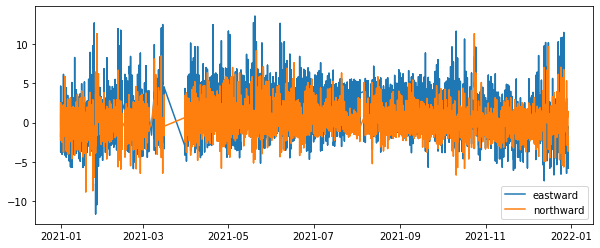

In [178]:
plt.figure(figsize=(10,4))
plt.plot(time,u)
plt.plot(time,v)
plt.legend(['eastward', 'northward'])

(-12.869475254467153,
 14.777600911333918,
 -9.81359073641843,
 12.305409082686593)

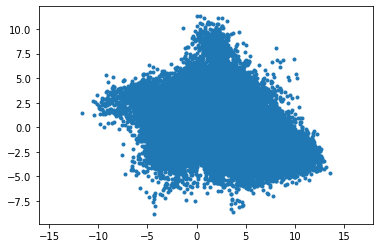

In [179]:
plt.figure()
plt.plot(u,v,'.')


# this line makes the scale equal on the x and y axes
plt.gca().axis('equal')

In [181]:
C = np.cov(u,v)
C

array([[ 6.0022512 , -0.66481543],
       [-0.66481543,  1.83298625]])

In [182]:
np.std(u)**2 #variance

6.0022381546384125

In [185]:
R = np.corrcoef(u,v)
R

array([[ 1.        , -0.20043077],
       [-0.20043077,  1.        ]])

The columns of the eigenvector matrix are the principal components. 
The principal components define the axes of the new rotated variables. 
The eigenvalues describe the variance of the each principal component.

In [186]:
val,vec = np.linalg.eig(C)

In [187]:
val #variance along new axes

array([6.10569371, 1.72954375])

In [188]:
vec #orientation of new axes

array([[ 0.98811043,  0.15374585],
       [-0.15374585,  0.98811043]])

In [189]:
sorti = np.argsort(val)[::-1]
val_sorted = val[sorti]
vec_sorted = vec[:,sorti]

In [190]:
val_sorted #highest eigen values is first. highest variance first 

array([6.10569371, 1.72954375])

In [191]:
vec_sorted #sorted these in the same way

array([[ 0.98811043,  0.15374585],
       [-0.15374585,  0.98811043]])

In [ ]:
#Computing the percentage of variance accounted for by each principal component.

In [192]:
pct_var = val_sorted/np.sum(val_sorted)*100

In [193]:
pct_var

array([77.92608385, 22.07391615])

In [ ]:
#Creating  Λ  and  𝑉  matrices from eigenvalues and eigenvectors.

In [195]:
LAMBDA = np.diag(val_sorted)
LAMBDA 

array([[6.10569371, 0.        ],
       [0.        , 1.72954375]])

In [196]:
V = vec_sorted
V

array([[ 0.98811043,  0.15374585],
       [-0.15374585,  0.98811043]])

In [ ]:
#The columns of the eigenvector matrix are the principal components. 
#The principal components define the axes of the new rotated variables.


In [197]:
PC1 = V[:,0]
PC2 = V[:,1]

In [198]:
PC1

array([ 0.98811043, -0.15374585])

In [199]:
PC2

array([0.15374585, 0.98811043])

In [ ]:
#Factor Loadings

In [200]:
A = np.dot(V,np.sqrt(LAMBDA))

In [201]:
A

array([[ 2.44159141,  0.20219443],
       [-0.37990142,  1.29948496]])

The principal component scores are the new, rotated data. The original  𝑢  and  𝑣  data are transformed into new variables  𝜏1  and  𝜏2 . The orginal data are rotated so that  𝜏1  is maximized and the variance along and  𝜏2  is minimized.

In [202]:
tau1 = u*PC1[0] + v*PC1[1]
tau2 = u*PC2[0] + v*PC2[1]

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


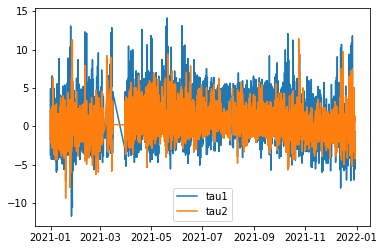

In [203]:
plt.figure()
plt.plot(time,tau1)
plt.plot(time,tau2)
plt.legend(['tau1', 'tau2']) #tau1 is now a variable defined by the first component
#blue is now oriented in the axis that is close to shore

(-12.982434708492942,
 15.364434739724246,
 -10.40065292515248,
 12.406722717679799)

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


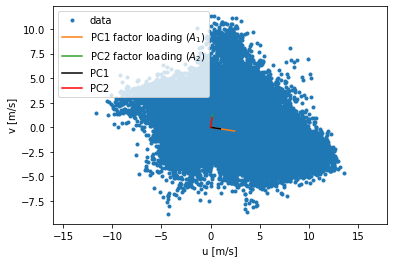

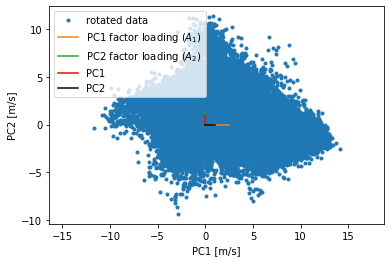

In [204]:
plt.figure()
plt.plot(u,v,'.')
plt.plot([0,A[0,0]],[0,A[1,0]])
plt.plot([0,A[0,1]],[0,A[1,1]])
plt.plot([0,PC1[0]],[0,PC1[1]],'k-')
plt.plot([0,PC2[0]],[0,PC2[1]],'r-')
plt.gca().axis('equal')
plt.xlabel('u [m/s]')
plt.ylabel('v [m/s]')
plt.legend(['data','PC1 factor loading ($A_1$)','PC2 factor loading ($A_2$)','PC1','PC2'])

plt.figure()
plt.plot(tau1,tau2,'.')
plt.plot([0,np.std(tau1)],[0,0])
plt.plot([0,0],[0,np.std(tau2)])
plt.plot([0,0],[0,1],'r-')
plt.plot([0,1],[0,0],'k-')
plt.legend(['rotated data','PC1 factor loading ($A_1$)','PC2 factor loading ($A_2$)','PC1','PC2'])
plt.xlabel('PC1 [m/s]')
plt.ylabel('PC2 [m/s]')
plt.gca().axis('equal')